In [45]:
from torchvision import datasets
import os
from torchtext import vocab
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx 
import matplotlib.pyplot as plt

In [46]:
mammals = ['beaver', 'dolphin', 'otter', 'seal', 'whale']
fish = ['goldfish', 'flatfish', 'ray', 'shark', 'trout']
flowers = ['orchid', 'poppy', 'rose', 'sunflower', 'tulip']
food_containers = ['bottle', 'bowl', 'can', 'cup', 'plate']
fruit_and_vegetables = ['apple', 'mushroom', 'orange', 'pear', 'pepper']
household_device = ['clock', 'keyboard', 'lamp', 'telephone', 'television']
household_furniture = ['bed', 'chair', 'couch', 'table', 'wardrobe']
insects = ['bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach']
large_carnivores = ['bear', 'leopard', 'lion', 'tiger', 'wolf']
large_man_made = ['bridge', 'castle', 'house', 'road', 'skyscraper']
large_natural_scenes = ['cloud', 'forest', 'mountain', 'plain', 'sea']
large_omnivores = ['camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo']
medium_sized_mammals = ['fox', 'porcupine', 'possum', 'raccoon', 'skunk']
non_insect_invertebrates = ['crab', 'lobster', 'snail', 'spider', 'worm']
people = ['baby', 'boy', 'girl', 'man', 'woman']
reptiles = ['crocodile', 'dinosaur', 'lizard', 'snake', 'turtle']
small_mammals = ['hamster', 'mouse', 'rabbit', 'shrew', 'squirrel']
trees = ['maple', 'oak', 'palm', 'pine', 'willow']
vehicles1 = ['bicycle', 'bus', 'motorcycle', 'truck', 'train']
vehicles2 = ['mower', 'rocket', 'streetcar', 'tank', 'tractor']
super_class_list = [mammals, small_mammals, medium_sized_mammals, people, large_omnivores, large_carnivores, non_insect_invertebrates, reptiles, fish, insects, 
                    flowers, trees, fruit_and_vegetables, food_containers, household_device, household_furniture, 
    vehicles1, vehicles2, large_man_made, large_natural_scenes]

In [47]:
train_dataset = datasets.cifar.CIFAR100(os.environ['DATA'], train=True, download=True)
class_to_idx = {}
for key, value in train_dataset.class_to_idx.items():
    if key == 'aquarium_fish':
        print('class {}: {} => {}'.format(value, key, 'goldfish'))
        key = 'goldfish'
    elif key == 'lawn_mower':
        print('class {}: {} => {}'.format(value, key, 'mower'))
        key = 'mower'
    elif key == 'maple_tree':
        print('class {}: {} => {}'.format(value, key, 'maple'))
        key = 'maple'
    elif key == 'oak_tree':
        print('class {}: {} => {}'.format(value, key, 'oak'))
        key = 'oak'
    elif key == 'palm_tree':
        print('class {}: {} => {}'.format(value, key, 'palm'))
        key = 'palm'
    elif key == 'pickup_truck':
        print('class {}: {} => {}'.format(value, key, 'truck'))
        key = 'truck'
    elif key == 'pine_tree':
        print('class {}: {} => {}'.format(value, key, 'pine'))
        key = 'pine'
    elif key == 'sweet_pepper':
        print('class {}: {} => {}'.format(value, key, 'pepper'))
        key = 'pepper'
    elif key == 'willow_tree':
        print('class {}: {} => {}'.format(value, key, 'willow'))
        key = 'willow'
    else:
        print('class {}: {}'.format(value, key))
    class_to_idx[key] = value

Files already downloaded and verified
class 0: apple
class 1: aquarium_fish => goldfish
class 2: baby
class 3: bear
class 4: beaver
class 5: bed
class 6: bee
class 7: beetle
class 8: bicycle
class 9: bottle
class 10: bowl
class 11: boy
class 12: bridge
class 13: bus
class 14: butterfly
class 15: camel
class 16: can
class 17: castle
class 18: caterpillar
class 19: cattle
class 20: chair
class 21: chimpanzee
class 22: clock
class 23: cloud
class 24: cockroach
class 25: couch
class 26: crab
class 27: crocodile
class 28: cup
class 29: dinosaur
class 30: dolphin
class 31: elephant
class 32: flatfish
class 33: forest
class 34: fox
class 35: girl
class 36: hamster
class 37: house
class 38: kangaroo
class 39: keyboard
class 40: lamp
class 41: lawn_mower => mower
class 42: leopard
class 43: lion
class 44: lizard
class 45: lobster
class 46: man
class 47: maple_tree => maple
class 48: motorcycle
class 49: mountain
class 50: mouse
class 51: mushroom
class 52: oak_tree => oak
class 53: orange
class

In [48]:
glove = vocab.pretrained_aliases["glove.840B.300d"]()

In [49]:
class_vectors = []
color_num = []
for key, value in class_to_idx.items():
    class_vectors.append(glove.vectors[glove.stoi[key]])
    super_class_id = None
    for color_id, super_class in enumerate(super_class_list):
        if key in super_class:
            color_num.append(color_id)
            super_class_id = color_id
            break
    if super_class_id is None:
        print('class {}: {} could not find super class'.format(value, key))
    else:
        print('class {}: {}-{}'.format(value, color_num[-1], key))
class_vectors = np.stack(class_vectors)

class 0: 12-apple
class 1: 8-goldfish
class 2: 3-baby
class 3: 5-bear
class 4: 0-beaver
class 5: 15-bed
class 6: 9-bee
class 7: 9-beetle
class 8: 16-bicycle
class 9: 13-bottle
class 10: 13-bowl
class 11: 3-boy
class 12: 18-bridge
class 13: 16-bus
class 14: 9-butterfly
class 15: 4-camel
class 16: 13-can
class 17: 18-castle
class 18: 9-caterpillar
class 19: 4-cattle
class 20: 15-chair
class 21: 4-chimpanzee
class 22: 14-clock
class 23: 19-cloud
class 24: 9-cockroach
class 25: 15-couch
class 26: 6-crab
class 27: 7-crocodile
class 28: 13-cup
class 29: 7-dinosaur
class 30: 0-dolphin
class 31: 4-elephant
class 32: 8-flatfish
class 33: 19-forest
class 34: 2-fox
class 35: 3-girl
class 36: 1-hamster
class 37: 18-house
class 38: 4-kangaroo
class 39: 14-keyboard
class 40: 14-lamp
class 41: 17-mower
class 42: 5-leopard
class 43: 5-lion
class 44: 7-lizard
class 45: 6-lobster
class 46: 3-man
class 47: 11-maple
class 48: 16-motorcycle
class 49: 19-mountain
class 50: 1-mouse
class 51: 12-mushroom
clas

In [50]:
len(color_num)

100

In [51]:
class_vectors.shape

(100, 300)

In [52]:
sim = cosine_similarity(class_vectors, class_vectors)*100
cross_mask = 1 - np.eye(sim.shape[0])
masked_sim = cross_mask * sim

In [53]:
graph = nx.from_numpy_array(masked_sim)

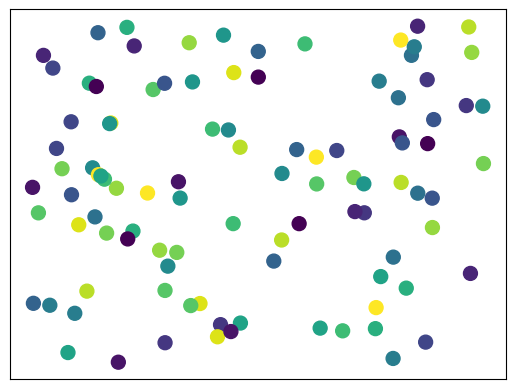

In [54]:
nx.draw_networkx_nodes(graph, nx.random_layout(graph), node_size=100, node_color=color_num)
# plt.leg

### 按照默认类别顺序可视化

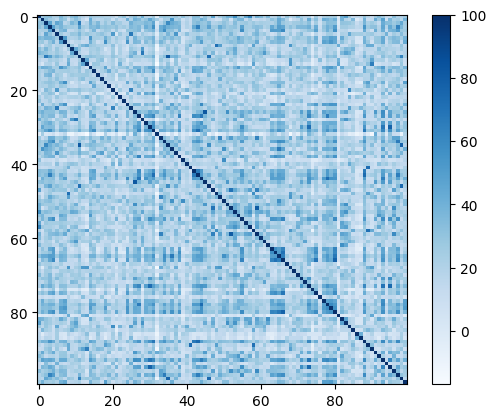

In [55]:
plt.imshow(sim, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()

### 按照超类可视化

In [56]:
class_vectors = []
class_id = 0
for super_class_id, super_class in enumerate(super_class_list):
    print('Super class group {}:'.format(super_class_id))
    for class_name in super_class:
        class_id += 1
        print('class {}: {}-{}'.format(class_id, super_class_id, class_name))
        class_vectors.append(glove.vectors[glove.stoi[class_name]])    
class_vectors = np.stack(class_vectors)

Super class group 0:
class 1: 0-beaver
class 2: 0-dolphin
class 3: 0-otter
class 4: 0-seal
class 5: 0-whale
Super class group 1:
class 6: 1-hamster
class 7: 1-mouse
class 8: 1-rabbit
class 9: 1-shrew
class 10: 1-squirrel
Super class group 2:
class 11: 2-fox
class 12: 2-porcupine
class 13: 2-possum
class 14: 2-raccoon
class 15: 2-skunk
Super class group 3:
class 16: 3-baby
class 17: 3-boy
class 18: 3-girl
class 19: 3-man
class 20: 3-woman
Super class group 4:
class 21: 4-camel
class 22: 4-cattle
class 23: 4-chimpanzee
class 24: 4-elephant
class 25: 4-kangaroo
Super class group 5:
class 26: 5-bear
class 27: 5-leopard
class 28: 5-lion
class 29: 5-tiger
class 30: 5-wolf
Super class group 6:
class 31: 6-crab
class 32: 6-lobster
class 33: 6-snail
class 34: 6-spider
class 35: 6-worm
Super class group 7:
class 36: 7-crocodile
class 37: 7-dinosaur
class 38: 7-lizard
class 39: 7-snake
class 40: 7-turtle
Super class group 8:
class 41: 8-goldfish
class 42: 8-flatfish
class 43: 8-ray
class 44: 8-sh

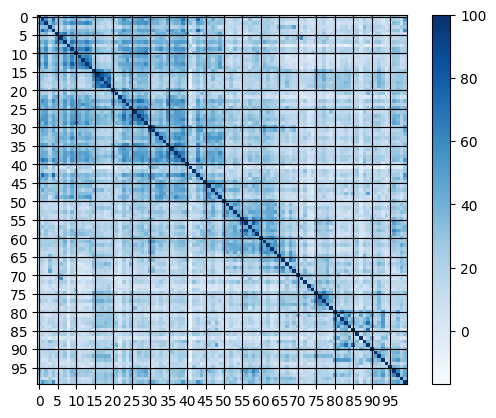

In [59]:
sim = cosine_similarity(class_vectors, class_vectors)*100
plt.imshow(sim, interpolation='nearest', cmap=plt.cm.Blues)
plt.xticks(list(range(0, 100, 5)))
plt.yticks(list(range(0, 100, 5)))
plt.grid(color='black')
plt.colorbar()